In [1]:
# %pip install numpy 
# %pip install pandas
# %pip install matplotlib
# %pip install scikit-learn
# %pip install seaborn
# %pip install plotly-express
# %pip install lightgbm
# %pip install statsmodels
# %pip install scikit-optimize
# %pip install nbformat
# %pip install bayesian-optimization==1.4.1
# %pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pickle
# from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.gofplots import qqplot_2samples
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
import sklearn.gaussian_process as gp
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.dates as mdates
import lightgbm as lgb
from sklearn.linear_model import Ridge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from skopt import gp_minimize
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
from lightgbm import LGBMRegressor
import nbformat
from bayes_opt import BayesianOptimization
import xgboost as xgb

C:\Users\balag\AppData\Local\Temp\ipykernel_21624\1011244447.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [46]:
%run models/Linear_Regression.ipynb

In [4]:
###################### Null values are already removed from this data set ##############################

In [5]:
data = pd.read_csv(r'D:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\data\calibrate.csv')
data

,dateTime,pm10_grimm,pm2_5_grimm,pm1_grimm,inhalable_grimm,thoracic_grimm,alveolic_grimm,NH3_loRa,CO_loRa,NO2_loRa,...,Humidity_loRa,pm1Palas,pm2_5Palas,pm4Palas,pm10Palas,pmTotalPalas,dCnPalas,temperaturePalas,humidityPalas,pressurehPalas
0,04/08/2019 03:22:30 +0000,8.06,7.48,6.06,8.06,8.06,7.74,0.02,0,4.92,...,67,7.500000,9.210000,11.390000,13.516667,15.256667,191.830000,28.303333,43.425000,987.790000
1,04/08/2019 03:23:00 +0000,7.84,7.04,6.06,7.84,7.82,7.32,0.02,0,4.90,...,68,7.493333,9.210000,11.386667,13.506667,15.246667,191.786667,28.286667,43.316667,987.850000
2,04/08/2019 03:23:30 +0000,8.98,7.58,6.08,8.98,8.96,8.22,0.02,0,4.90,...,68,7.490000,9.206667,11.380000,13.493333,15.226667,191.736667,28.250000,43.301667,987.810000
3,04/08/2019 03:24:00 +0000,8.90,7.60,5.96,8.90,8.74,7.80,0.02,0,4.90,...,68,7.490000,9.200000,11.370000,13.480000,15.206667,191.703333,28.215000,43.483333,987.810000
4,04/08/2019 03:24:30 +0000,9.72,7.72,6.14,9.72,9.66,8.40,0.02,0,4.90,...,68,7.490000,9.200000,11.360000,13.466667,15.193333,191.676667,28.205000,43.381667,987.810000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,04/10/2019 10:52:30 +0000,8.64,5.62,4.94,8.72,8.18,6.08,0.14,0,4.71,...,52,5.913333,6.883333,7.923333,12.833333,20.376667,204.200000,29.251667,30.115000,980.160000
2059,04/10/2019 10:53:00 +0000,9.72,5.98,5.20,33.96,11.90,6.86,0.14,0,4.73,...,52,5.923333,6.853333,7.813333,12.610000,20.093333,205.363333,29.228333,30.173333,980.280000
2060,04/10/2019 10:54:00 +0000,11.14,6.82,5.10,30.24,13.58,7.72,0.14,0,4.76,...,52,5.986667,6.866667,7.680000,12.440000,19.880000,208.336667,29.238333,30.260000,980.038333
2061,04/10/2019 10:54:30 +0000,10.02,6.66,5.12,33.36,14.00,7.46,0.14,0,4.73,...,52,6.023333,6.903333,7.716667,12.476667,19.916667,209.700000,29.180000,30.353333,980.218333


In [6]:
data.columns

Index(['dateTime', 'pm10_grimm', 'pm2_5_grimm', 'pm1_grimm', 'inhalable_grimm',
       'thoracic_grimm', 'alveolic_grimm', 'NH3_loRa', 'CO_loRa', 'NO2_loRa',
       'C3H8_loRa', 'C4H10_loRa', 'CH4_loRa', 'H2_loRa', 'C2H5OH_loRa',
       'P1_lpo_loRa', 'P1_ratio_loRa', 'P1_conc_loRa', 'P2_lpo_loRa',
       'P2_ratio_loRa', 'P2_conc_loRa', 'Temperature_loRa', 'Pressure_loRa',
       'Humidity_loRa', 'pm1Palas', 'pm2_5Palas', 'pm4Palas', 'pm10Palas',
       'pmTotalPalas', 'dCnPalas', 'temperaturePalas', 'humidityPalas',
       'pressurehPalas'],
      dtype='object')

In [7]:
len(data.columns)

33

In [8]:
df= pd.concat([data.iloc[:,6], data.iloc[:,0:6],data.iloc[:,15:data.shape[1]]],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2063 entries, 0 to 2062
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   alveolic_grimm    2063 non-null   float64
 1   dateTime          2063 non-null   object 
 2   pm10_grimm        2063 non-null   float64
 3   pm2_5_grimm       2063 non-null   float64
 4   pm1_grimm         2063 non-null   float64
 5   inhalable_grimm   2063 non-null   float64
 6   thoracic_grimm    2063 non-null   float64
 7   P1_lpo_loRa       2063 non-null   int64  
 8   P1_ratio_loRa     2063 non-null   float64
 9   P1_conc_loRa      2063 non-null   float64
 10  P2_lpo_loRa       2063 non-null   int64  
 11  P2_ratio_loRa     2063 non-null   float64
 12  P2_conc_loRa      2063 non-null   float64
 13  Temperature_loRa  2063 non-null   float64
 14  Pressure_loRa     2063 non-null   int64  
 15  Humidity_loRa     2063 non-null   int64  
 16  pm1Palas          2063 non-null   float64


In [9]:
def data_checker(df):
    # data_frame = df.iloc[:,1:16]
    data_frame =  df.iloc[:,7:-3] 
    # Palas limits are 0-100 mg/m3
    #BME limits are :Temp -40C to 85C
                   #:Pressure 300hPa to 1100 hPa or  300*100Pa to 1100*100 Pa
                   #:Humidity 0% to 100%
     #PPD42NS :Operating Temp is 0C to 45C
    idx = data_frame[(data_frame['Temperature_loRa']>=0) & (data_frame['Temperature_loRa']<=45) &
                    (data_frame['Pressure_loRa']>=300*100) & (data_frame['Pressure_loRa']<=1100*100) &
                    (data_frame['Humidity_loRa']>=0) & (data_frame['Humidity_loRa']<=100) &
                    (data_frame['pm1Palas']>=0) & (data_frame['pm2_5Palas']>=0) &
                    (data_frame['pm4Palas']>=0) & (data_frame['pm10Palas']>=0) &
                    (data_frame['pmTotalPalas']>=0) & (data_frame['dCnPalas']>=0)&
                    (data_frame['pm1Palas']<=100000) & (data_frame['pm2_5Palas']<=100000) &
                    (data_frame['pm4Palas']<=100000) & (data_frame['pm10Palas']<=100000) &
                    (data_frame['pmTotalPalas']<=100000) & (data_frame['dCnPalas']<=100000)].index
                    # &
                    # (data_frame['P1_conc_loRa'] + data_frame['P2_conc_loRa']>=0) &
                    # (data_frame['P1_conc_loRa'] + data_frame['P2_conc_loRa']<=28000)].index
    return df.loc[idx]
data_checker(df)

,alveolic_grimm,dateTime,pm10_grimm,pm2_5_grimm,pm1_grimm,inhalable_grimm,thoracic_grimm,P1_lpo_loRa,P1_ratio_loRa,P1_conc_loRa,...,Humidity_loRa,pm1Palas,pm2_5Palas,pm4Palas,pm10Palas,pmTotalPalas,dCnPalas,temperaturePalas,humidityPalas,pressurehPalas
0,7.74,04/08/2019 03:22:30 +0000,8.06,7.48,6.06,8.06,8.06,2556,0.02,9.48,...,67,7.500000,9.210000,11.390000,13.516667,15.256667,191.830000,28.303333,43.425000,987.790000
1,7.32,04/08/2019 03:23:00 +0000,7.84,7.04,6.06,7.84,7.82,0,0.00,0.62,...,68,7.493333,9.210000,11.386667,13.506667,15.246667,191.786667,28.286667,43.316667,987.850000
2,8.22,04/08/2019 03:23:30 +0000,8.98,7.58,6.08,8.98,8.96,86608,0.58,299.81,...,68,7.490000,9.206667,11.380000,13.493333,15.226667,191.736667,28.250000,43.301667,987.810000
3,7.80,04/08/2019 03:24:00 +0000,8.90,7.60,5.96,8.90,8.74,0,0.00,0.62,...,68,7.490000,9.200000,11.370000,13.480000,15.206667,191.703333,28.215000,43.483333,987.810000
4,8.40,04/08/2019 03:24:30 +0000,9.72,7.72,6.14,9.72,9.66,153937,1.03,531.46,...,68,7.490000,9.200000,11.360000,13.466667,15.193333,191.676667,28.205000,43.381667,987.810000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,6.08,04/10/2019 10:52:30 +0000,8.64,5.62,4.94,8.72,8.18,73639,0.49,255.12,...,52,5.913333,6.883333,7.923333,12.833333,20.376667,204.200000,29.251667,30.115000,980.160000
2059,6.86,04/10/2019 10:53:00 +0000,9.72,5.98,5.20,33.96,11.90,0,0.00,0.62,...,52,5.923333,6.853333,7.813333,12.610000,20.093333,205.363333,29.228333,30.173333,980.280000
2060,7.72,04/10/2019 10:54:00 +0000,11.14,6.82,5.10,30.24,13.58,0,0.00,0.62,...,52,5.986667,6.866667,7.680000,12.440000,19.880000,208.336667,29.238333,30.260000,980.038333
2061,7.46,04/10/2019 10:54:30 +0000,10.02,6.66,5.12,33.36,14.00,0,0.00,0.62,...,52,6.023333,6.903333,7.716667,12.476667,19.916667,209.700000,29.180000,30.353333,980.218333


In [10]:
df = data_checker(df)
df

,alveolic_grimm,dateTime,pm10_grimm,pm2_5_grimm,pm1_grimm,inhalable_grimm,thoracic_grimm,P1_lpo_loRa,P1_ratio_loRa,P1_conc_loRa,...,Humidity_loRa,pm1Palas,pm2_5Palas,pm4Palas,pm10Palas,pmTotalPalas,dCnPalas,temperaturePalas,humidityPalas,pressurehPalas
0,7.74,04/08/2019 03:22:30 +0000,8.06,7.48,6.06,8.06,8.06,2556,0.02,9.48,...,67,7.500000,9.210000,11.390000,13.516667,15.256667,191.830000,28.303333,43.425000,987.790000
1,7.32,04/08/2019 03:23:00 +0000,7.84,7.04,6.06,7.84,7.82,0,0.00,0.62,...,68,7.493333,9.210000,11.386667,13.506667,15.246667,191.786667,28.286667,43.316667,987.850000
2,8.22,04/08/2019 03:23:30 +0000,8.98,7.58,6.08,8.98,8.96,86608,0.58,299.81,...,68,7.490000,9.206667,11.380000,13.493333,15.226667,191.736667,28.250000,43.301667,987.810000
3,7.80,04/08/2019 03:24:00 +0000,8.90,7.60,5.96,8.90,8.74,0,0.00,0.62,...,68,7.490000,9.200000,11.370000,13.480000,15.206667,191.703333,28.215000,43.483333,987.810000
4,8.40,04/08/2019 03:24:30 +0000,9.72,7.72,6.14,9.72,9.66,153937,1.03,531.46,...,68,7.490000,9.200000,11.360000,13.466667,15.193333,191.676667,28.205000,43.381667,987.810000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,6.08,04/10/2019 10:52:30 +0000,8.64,5.62,4.94,8.72,8.18,73639,0.49,255.12,...,52,5.913333,6.883333,7.923333,12.833333,20.376667,204.200000,29.251667,30.115000,980.160000
2059,6.86,04/10/2019 10:53:00 +0000,9.72,5.98,5.20,33.96,11.90,0,0.00,0.62,...,52,5.923333,6.853333,7.813333,12.610000,20.093333,205.363333,29.228333,30.173333,980.280000
2060,7.72,04/10/2019 10:54:00 +0000,11.14,6.82,5.10,30.24,13.58,0,0.00,0.62,...,52,5.986667,6.866667,7.680000,12.440000,19.880000,208.336667,29.238333,30.260000,980.038333
2061,7.46,04/10/2019 10:54:30 +0000,10.02,6.66,5.12,33.36,14.00,0,0.00,0.62,...,52,6.023333,6.903333,7.716667,12.476667,19.916667,209.700000,29.180000,30.353333,980.218333


In [11]:
df.describe()

,alveolic_grimm,pm10_grimm,pm2_5_grimm,pm1_grimm,inhalable_grimm,thoracic_grimm,P1_lpo_loRa,P1_ratio_loRa,P1_conc_loRa,P2_lpo_loRa,...,Humidity_loRa,pm1Palas,pm2_5Palas,pm4Palas,pm10Palas,pmTotalPalas,dCnPalas,temperaturePalas,humidityPalas,pressurehPalas
count,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2.063000e+03,...,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000
mean,7.626583,10.021008,6.923800,5.866670,18.277838,10.487571,26775.528357,0.178507,93.041299,1.317343e+05,...,46.711100,6.525406,7.786447,9.242287,14.728641,24.882920,209.331043,32.621074,26.367609,982.382139
std,2.123536,2.755813,2.063206,1.780787,15.991072,2.924185,63234.738633,0.421589,218.421909,1.904410e+05,...,18.411397,1.910236,2.170070,2.583149,3.898749,10.253577,58.102719,3.740014,10.466718,15.092447
min,3.080000,3.260000,2.920000,2.440000,3.260000,3.260000,0.000000,0.000000,0.620000,0.000000e+00,...,20.000000,1.536667,2.226667,1.603333,4.316667,4.463333,54.993333,26.543333,6.611667,700.000000
25%,6.040000,7.980000,5.300000,4.200000,9.420000,8.390000,0.000000,0.000000,0.620000,0.000000e+00,...,35.000000,4.440000,5.723333,7.195000,12.606667,16.770000,154.331667,29.672500,19.890000,981.640000
50%,7.260000,9.920000,6.560000,5.600000,12.320000,10.400000,0.000000,0.000000,0.620000,7.565400e+04,...,42.000000,6.783333,7.960000,9.370000,14.343333,22.623333,208.360000,32.566667,23.921667,983.498333
75%,9.480000,11.920000,8.570000,7.360000,21.220000,12.300000,0.000000,0.000000,0.620000,1.876995e+05,...,48.000000,8.123333,9.590000,11.553333,16.238333,30.716667,241.365000,35.459167,27.833333,987.890000
max,15.040000,24.300000,14.220000,13.240000,192.560000,23.260000,723931.000000,4.830000,2545.390000,2.863259e+06,...,85.000000,17.293333,19.593333,20.923333,37.983333,119.296667,396.230000,41.660000,47.730000,989.130000


In [12]:
########### Plot the distribution of all the input parameters ############

In [13]:
dict_col_names = {'pm1Palas':'PM$_{1.0}$ in $\mu g/m^3 $ (Palas)', 
                  'pm2_5Palas': 'PM$_{2.5}$ in $\mu g/m^3$ (Palas)',
                  'pm4Palas': 'PM$_{4.0}$ in $\mu g/m^3$ (Palas)',
                  'pm10Palas': 'PM$_{10.0}$ in $\mu g/m^3$ (Palas)',
                  'pmTotalPalas': 'Total PM Concentration in $\mu g/m^3$ (Palas)', 
                  'dCnPalas': 'Particle Count Density in #/cm$^{3}$ (Palas)', 
                  'P1_lpo_loRa': '> 1 μm LPO (LoRa)',
                  'P1_ratio_loRa': '> 1 μm Ratio (LoRa)',
                  'P1_conc_loRa':'> 1 μm Concentration in $\mu g/m^3$ (LoRa)' , 
                  'P2_lpo_loRa': '> 2.5 μm LPO (LoRa)',
                  'P2_ratio_loRa': '> 2.5 μm Ratio (LoRa)', 
                  'P2_conc_loRa': '> 2.5 μm Concentration in $\mu g/m^3$ (LoRa)',
                  'Temperature_loRa': 'Temperature in ℃ (LoRa)', 
                  'Pressure_loRa': 'Pressure in Pa (LoRa)',
                  'Humidity_loRa': 'Humidity in % (LoRa)'} 

In [14]:
def hist_plots(df):
    for col in df.columns[1:len(df.columns)]:
        sns.histplot(df[col], kde = True, color = 'blue', bins = 30)
        plt.title(f'{dict_col_names[col]} Histogram with KDE')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
#hist_plots(df)

In [15]:
############# Plotting box plot for each parameter ################

In [16]:
def box_plots(df):
    for col in df.columns[1:len(df.columns)]:
        plt.boxplot(df[col])
        plt.title(f'{dict_col_names[col]} BoxPlot')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
# box_plots(df)

In [17]:
df_up = df.iloc[:,7:-3]
df_up

,P1_lpo_loRa,P1_ratio_loRa,P1_conc_loRa,P2_lpo_loRa,P2_ratio_loRa,P2_conc_loRa,Temperature_loRa,Pressure_loRa,Humidity_loRa,pm1Palas,pm2_5Palas,pm4Palas,pm10Palas,pmTotalPalas,dCnPalas
0,2556,0.02,9.48,151843,1.01,524.26,20.53,98866,67,7.500000,9.210000,11.390000,13.516667,15.256667,191.830000
1,0,0.00,0.62,67639,0.45,234.43,20.38,98866,68,7.493333,9.210000,11.386667,13.506667,15.246667,191.786667
2,86608,0.58,299.81,332245,2.21,1145.71,20.31,98869,68,7.490000,9.206667,11.380000,13.493333,15.226667,191.736667
3,0,0.00,0.62,30289,0.20,105.48,20.27,98868,68,7.490000,9.200000,11.370000,13.480000,15.206667,191.703333
4,153937,1.03,531.46,285021,1.90,982.52,20.20,98868,68,7.490000,9.200000,11.360000,13.466667,15.193333,191.676667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,73639,0.49,255.12,162046,1.08,559.33,20.69,98121,52,5.913333,6.883333,7.923333,12.833333,20.376667,204.200000
2059,0,0.00,0.62,7320,0.05,25.99,20.69,98125,52,5.923333,6.853333,7.813333,12.610000,20.093333,205.363333
2060,0,0.00,0.62,0,0.00,0.62,20.70,98123,52,5.986667,6.866667,7.680000,12.440000,19.880000,208.336667
2061,0,0.00,0.62,15928,0.11,55.80,20.69,98122,52,6.023333,6.903333,7.716667,12.476667,19.916667,209.700000


In [18]:
###################### Removing Outliers using IQR method ############################

In [19]:
# hist_plots(filtered_data)

In [20]:
# box_plots(filtered_data)

In [21]:
######################### Start Running various Machine Learning Models ###########################

In [22]:
#Insted of filtered data lets use df and see the difference
filtered_data = df_up
filtered_data

,P1_lpo_loRa,P1_ratio_loRa,P1_conc_loRa,P2_lpo_loRa,P2_ratio_loRa,P2_conc_loRa,Temperature_loRa,Pressure_loRa,Humidity_loRa,pm1Palas,pm2_5Palas,pm4Palas,pm10Palas,pmTotalPalas,dCnPalas
0,2556,0.02,9.48,151843,1.01,524.26,20.53,98866,67,7.500000,9.210000,11.390000,13.516667,15.256667,191.830000
1,0,0.00,0.62,67639,0.45,234.43,20.38,98866,68,7.493333,9.210000,11.386667,13.506667,15.246667,191.786667
2,86608,0.58,299.81,332245,2.21,1145.71,20.31,98869,68,7.490000,9.206667,11.380000,13.493333,15.226667,191.736667
3,0,0.00,0.62,30289,0.20,105.48,20.27,98868,68,7.490000,9.200000,11.370000,13.480000,15.206667,191.703333
4,153937,1.03,531.46,285021,1.90,982.52,20.20,98868,68,7.490000,9.200000,11.360000,13.466667,15.193333,191.676667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,73639,0.49,255.12,162046,1.08,559.33,20.69,98121,52,5.913333,6.883333,7.923333,12.833333,20.376667,204.200000
2059,0,0.00,0.62,7320,0.05,25.99,20.69,98125,52,5.923333,6.853333,7.813333,12.610000,20.093333,205.363333
2060,0,0.00,0.62,0,0.00,0.62,20.70,98123,52,5.986667,6.866667,7.680000,12.440000,19.880000,208.336667
2061,0,0.00,0.62,15928,0.11,55.80,20.69,98122,52,6.023333,6.903333,7.716667,12.476667,19.916667,209.700000


In [23]:
col_name = list(df_up)
x =[]
y_Palas  = []
for i in col_name:
    if "_loRa" in i:
        x.append(i)
    if "Palas" in i:
        y_Palas.append(i)
Palas = {}
for i in y_Palas:
    Palas_cols = x + [i]
    Palas[i[:-len("Palas")]] = filtered_data[Palas_cols]
y_Palas

['pm1Palas', 'pm2_5Palas', 'pm4Palas', 'pm10Palas', 'pmTotalPalas', 'dCnPalas']

In [24]:
def plot_residuals(predict_test,y_test,filtered_data):
    idx = X_test.index
    data_test = filtered_data.loc[idx]
    data_test["dateTime"] = pd.to_datetime(data_test["dateTime"])
    residuals = (np.array(y_test) - predict_test)**2
    plt.figure()
    plt.scatter(data_test["dateTime"], residuals)
    plt.xticks(rotation = 45)
    plt.xlabel('Date Time')
    plt.ylabel(y_test.name)
    plt.show()

In [25]:
dict_col_regression = {'pm1Palas':'PM$_{1.0}$', 
                       'pm2_5Palas': 'PM$_{2.5}$',
                       'pm4Palas': 'PM$_{4.0}$',
                       'pm10Palas': 'PM$_{10.0}$',
                       'pmTotalPalas': 'Total PM Concentration', 
                       'dCnPalas': 'Particle Count Density',
                       'dateTime': 'Date Time',
                       'P1_lpo_loRa':'> 1 μm LPO',
                       'P1_ratio_loRa': '> 1 μm ratio', 
                       'P1_conc_loRa': '> 1 μm Concentration', 
                       'P2_lpo_loRa': '> 2.5 μm LPO', 
                       'P2_ratio_loRa': '> 2.5 μm ratio',
                       'P2_conc_loRa': '> 2.5 μm Concentration' , 
                       'Temperature_loRa': 'Temperature', 
                       'Pressure_loRa': 'Pressure', 
                       'Humidity_loRa':'Humidity'}
unit_regression = {'pm_conc':'($\mu g/m^3$)',
                   'dCn':'(#/cm$^{3}$)'} 

In [26]:
for k,v in enumerate(Palas):
    print(v)

pm1
pm2_5
pm4
pm10
pmTotal
dCn


In [27]:


r2_score_test_lr ={}
r2_score_test_nn ={}
r2_score_test_rf ={}
r2_score_test_br ={}
r2_score_test_dt ={}
r2_score_test_lgbm ={}
r2_score_test_gr = {}
r2_score_test_rr = {}
r2_score_test_knn = {}
r2_score_test_xgb = {}
r2_score_test_et = {}
r2_score_test_sl = {}

%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Linear_Regression.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Random_Forest_Regression.ipynb
#%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Extra_Trees_Regression.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Decision_Tree_Regression.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Ensemble_Bagging_Regression.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/LGBM_Regression.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Gaussian_Regression.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Ridge_Regression.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/KNN_Regression.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Neural_Network_Regression.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/XGBoost_Regression.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Stacking_Regression.ipynb
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Random_Forest_Regression_Optimized.ipynb
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Neural_Network_Regression_Optimized.ipynb
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Decision_Tree_Regression_Optimized.ipynb
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Ensemble_Bagging_Regression_Optimized.ipynb
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/LGBM_Regression_Optimized.ipynb


trained_model_nn={}
trained_model_rf={}
trained_model_br={}
trained_model_dt={}
trained_model_lgbm={}

hyperparameters_nn={}
hyperparameters_rf={}
hyperparameters_br={}
hyperparameters_dt={}
hyperparameters_lgbm={} 

for k,v in enumerate(Palas):
    X = Palas[v].drop([v+"Palas"],axis = 1)
    y = Palas[v][v+"Palas"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state= 40)
    X_train.to_csv("X_train.csv")
    X_test.to_csv("X_test.csv")
    y_train.to_csv("y_train.csv")
    y_test.to_csv("y_test.csv")
    # print("x train",X_train.shape)
    # print("x test",X_test.shape)
    # print("y train",y_train.shape)
    # print("y test",y_test.shape)

    r2_score_test_lr[v] =  Linear_Regression(X_train,X_test,y_train,y_test,filtered_data)
    r2_score_test_rf[v] = Random_Forest_Regression(X_train,X_test,y_train,y_test,filtered_data)
    r2_score_test_xgb[v] = XGBoost_Regression(X_train,X_test,y_train,y_test,filtered_data)
    r2_score_test_dt[v] = Decision_Tree_Regression(X_train,X_test,y_train,y_test,filtered_data)   
    r2_score_test_lgbm[v]  =  LGBM_Regression(X_train,X_test,y_train,y_test,filtered_data)
    r2_score_test_br[v] = Ensemble_Bagging_Regression(X_train,X_test,y_train,y_test,filtered_data)
    r2_score_test_nn[v] = Neural_Network_Regression(X_train,X_test,y_train,y_test,filtered_data)
    # #r2_score_test_gr[v] =  Gaussian_Regression(X_train,X_test,y_train,y_test,filtered_data)
    r2_score_test_rr[v] = Ridge_Regression(X_train,X_test,y_train,y_test,filtered_data)
    r2_score_test_knn[v] = KNN_Regression(X_train,X_test,y_train,y_test,filtered_data)
    r2_score_test_sl[v] = Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data)


print('before filtering')
print('lr',r2_score_test_lr)
print('rf',r2_score_test_rf)
print('xgb',r2_score_test_xgb)
print('dt',r2_score_test_dt)   
print('lgbm',r2_score_test_lgbm)
print('br',r2_score_test_br)
print('nn',r2_score_test_nn)
#print('gr',r2_score_test_gr[v])
print('rr',r2_score_test_rr)
print('knn',r2_score_test_knn)
print('sl',r2_score_test_sl)

        Actual  Predicted  Category
0     7.500000   7.151880   Testing
1     7.493333   7.119667   Testing
2     7.490000   7.265258  Training
3     7.490000   7.089793  Training
4     7.490000   7.158127  Training
...        ...        ...       ...
2058  5.913333   8.180284  Training
2059  5.923333   8.135780  Training
2060  5.986667   8.144720  Training
2061  6.023333   8.137443  Training
2062  6.053333   8.109440  Training

[2063 rows x 3 columns]
R2 value of train data 0.48
R2 value of test data 0.47
        Actual  Predicted  Category
0     7.500000   7.485400   Testing
1     7.493333   7.485200   Testing
2     7.490000   7.490000  Training
3     7.490000   7.490000  Training
4     7.490000   7.490000  Training
...        ...        ...       ...
2058  5.913333   5.929733  Training
2059  5.923333   5.950533  Training
2060  5.986667   5.966667  Training
2061  6.023333   5.977600  Training
2062  6.053333   6.001133  Training

[2063 rows x 3 columns]
R2 value of train data 1.0
R2 v

In [28]:
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Stacking_Regression_Optimized.ipynb


# r2_score_test_lr ={}
# r2_score_test_nn ={}
# r2_score_test_rf ={}
# r2_score_test_br ={}
# r2_score_test_dt ={}
# r2_score_test_lgbm ={}
# r2_score_test_gr = {}
# r2_score_test_rr = {}
# r2_score_test_knn = {}
# r2_score_test_sl = {}

# for k,v in enumerate(Palas):
#     X = Palas[v].drop([v+"Palas"],axis = 1)
#     y = Palas[v][v+"Palas"]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state= 40)
#     # print("x train",X_train.shape)
#     # print("x test",X_test.shape)
#     # print("y train",y_train.shape)
#     # print("y test",y_test.shape)
    
#     # r2_score_test_lr[v] =  Linear_Regression(X_train,X_test,y_train,y_test,filtered_data)
#     r2_score_test_rf[v] = Random_Forest_Regression(X_train,X_test,y_train,y_test,filtered_data)
#     # r2_score_test_dt[v] = Decision_Tree_Regression(X_train,X_test,y_train,y_test,filtered_data)   
#     # r2_score_test_lgbm[v]  =  LGBM_Regression(X_train,X_test,y_train,y_test,filtered_data)
#     # r2_score_test_br[v] = Ensemble_Bagging_Regression(X_train,X_test,y_train,y_test,filtered_data)
#     # r2_score_test_nn[v] = Neural_Network_Regression(X_train,X_test,y_train,y_test,filtered_data)
#     # #r2_score_test_gr[v] =  Gaussian_Regression(X_train,X_test,y_train,y_test,filtered_data)
#     # r2_score_test_rr[v] = Ridge_Regression(X_train,X_test,y_train,y_test,filtered_data)
#     # r2_score_test_knn[v] = KNN_Regression(X_train,X_test,y_train,y_test,filtered_data)
#     r2_score_test_sl[v] = Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data)


# # print('before filtering')
# # print('lr',r2_score_test_lr)
# print('rf',r2_score_test_rf)
# # print('dt',r2_score_test_dt)   
# # print('lgbm',r2_score_test_lgbm)
# # print('br',r2_score_test_br)
# # print('nn',r2_score_test_nn)
# # #print('gr',r2_score_test_gr[v])
# # print('rr',r2_score_test_rr)
# # print('knn',r2_score_test_knn)
# print('sl',r2_score_test_sl)


In [29]:
combined_dict ={key: [r2_score_test_lr.get(key),r2_score_test_rf.get(key), r2_score_test_br.get(key),r2_score_test_lgbm.get(key), r2_score_test_nn.get(key), r2_score_test_dt.get(key),r2_score_test_rr.get(key),r2_score_test_knn.get(key),r2_score_test_sl.get(key)] for key in r2_score_test_nn}
r2_values = combined_dict
# Creating a DataFrame from the dictionary
models = ["Linear Regressor","Random Forest", "Ensemble Bagging","LGBM", "Neural Network", "Decision Tree","Ridge Regressor","KNN","Super Learner"]
r2_values
df_updated_r2 = pd.DataFrame(r2_values, index=models)
df_updated_r2.index.name = 'Model'
df_updated_r2.columns.name = 'Target Variable'


df_updated_r2.to_csv("Before_filtering_R2.csv",index=True)

In [30]:
r2_score_test_rf_optim ={}
r2_score_test_dt_optim ={}
r2_score_test_nn_optim ={}
r2_score_test_br_optim ={}
r2_score_test_lgbm_optim ={}

In [31]:
trained_model_knn = {}
hyperparameters_knn = {}
r2_score_test_knn_optim = {}
print("========================= KNN Regressor ================================")
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/KNN_Regression_Optimized.ipynb

for k,v in enumerate(Palas):
    X = Palas[v].drop([v+"Palas"],axis = 1)
    y = Palas[v][v+"Palas"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state= 40)
    # print("x train",X_train.shape)
    # print("x test",X_test.shape)
    # print("y train",y_train.shape)
    # print("y test",y_test.shape)
    
    # print(Random_Forest_Regression(X_train,X_test,y_train,y_test,filtered_data))
    model,hyperparameters,r2_score_test = KNN_Regression(X_train,X_test,y_train,y_test,filtered_data)
    trained_model_knn[v] = model
    hyperparameters_knn[v] = hyperparameters
    r2_score_test_knn_optim[v] = r2_score_test
r2_score_test_knn_optim

========================= KNN Regressor ================================
|   iter    |  target   | n_neig... |     p     |
-------------------------------------------------
| 1         | 0.9176    | 12.17     | 1.72      |
| 2         | 0.9416    | 3.003     | 1.302     |
| 3         | 0.924     | 6.229     | 1.092     |
| 4         | 0.9255    | 7.098     | 1.346     |
| 5         | 0.9177    | 11.73     | 1.539     |


| 6         | 0.9369    | 3.0       | 2.0       |
| 7         | 0.9002    | 24.99     | 1.034     |
| 8         | 0.9122    | 17.92     | 2.0       |
| 9         | 0.9416    | 3.755     | 1.0       |
| 10        | 0.9416    | 3.095     | 1.011     |
| 11        | 0.9039    | 21.02     | 1.0       |
| 12        | 0.9391    | 4.461     | 2.0       |
| 13        | 0.9152    | 15.11     | 1.0       |
| 14        | 0.9334    | 9.058     | 2.0       |
| 15        | 0.9416    | 3.66      | 1.525     |
Optimal Parameters: {'n_neighbors': 3, 'p': 1}
        Actual  Predicted  Category
0     7.500000   7.466667   Testing
1     7.493333   7.485556   Testing
2     7.490000   7.556667  Training
3     7.490000   7.486667  Training
4     7.490000   7.610000  Training
...        ...        ...       ...
2058  5.913333   6.300000  Training
2059  5.923333   5.911111  Training
2060  5.986667   5.880000  Training
2061  6.023333   5.972222  Training
2062  6.053333   6.172222  Training

[2063 rows x 3 colum

{'pm1': 0.94,
 'pm2_5': 0.93,
 'pm4': 0.94,
 'pm10': 0.69,
 'pmTotal': 0.58,
 'dCn': 0.96}

In [32]:
print("========================= Random Forest Regressor ================================")
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Random_Forest_Regression_Optimized.ipynb

for k,v in enumerate(Palas):
    X = Palas[v].drop([v+"Palas"],axis = 1)
    y = Palas[v][v+"Palas"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state= 40)
    # print("x train",X_train.shape)
    # print("x test",X_test.shape)
    # print("y train",y_train.shape)
    # print("y test",y_test.shape)
    
    # print(Random_Forest_Regression(X_train,X_test,y_train,y_test,filtered_data))
    model,hyperparameters,r2_score_test = Random_Forest_Regression(X_train,X_test,y_train,y_test,filtered_data)
    trained_model_rf[v] = model
    hyperparameters_rf[v] = hyperparameters
    r2_score_test_rf_optim[v] = r2_score_test
r2_score_test_rf_optim

========================= Random Forest Regressor ================================
|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.9861    | 18.72     | 3.861     | 6.822     | 59.04     |
| 2         | 0.9869    | 15.59     | 3.584     | 5.501     | 90.26     |
| 3         | 0.9865    | 29.09     | 2.534     | 8.334     | 57.6      |
| 4         | 0.9845    | 19.2      | 4.702     | 2.568     | 17.84     |
| 5         | 0.9683    | 5.505     | 4.33      | 8.225     | 88.3      |
| 6         | 0.9862    | 19.91     | 4.214     | 7.34      | 56.12     |
| 7         | 0.9869    | 23.43     | 3.026     | 3.642     | 91.46     |
| 8         | 0.9862    | 19.91     | 4.914     | 7.732     | 99.85     |
| 9         | 0.9862    | 23.6      | 4.649     | 7.835     | 81.34     |
| 10        | 0.9852    | 28.81     | 5.0       | 2.0       | 68.52     |
| 11        | 0.9886    | 28.

{'pm1': 0.99,
 'pm2_5': 0.99,
 'pm4': 0.99,
 'pm10': 0.9,
 'pmTotal': 0.86,
 'dCn': 0.99}

In [33]:
print("========================= Decision Tree Regressor ================================")
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Decision_Tree_Regression_Optimized.ipynb

for k,v in enumerate(Palas):
    X = Palas[v].drop([v+"Palas"],axis = 1)
    y = Palas[v][v+"Palas"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state= 40)
    # print("x train",X_train.shape)
    # print("x test",X_test.shape)
    # print("y train",y_train.shape)
    # print("y test",y_test.shape)
    
    # print(Random_Forest_Regression(X_train,X_test,y_train,y_test,filtered_data))
    model,hyperparameters,r2_score_test = Decision_Tree_Regression(X_train,X_test,y_train,y_test,filtered_data)
    trained_model_dt[v] = model
    hyperparameters_dt[v] = hyperparameters
    r2_score_test_dt_optim[v] = r2_score_test
r2_score_test_dt_optim

========================= Decision Tree Regressor ================================
|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | 0.9776    | 18.01     | 7.437     | 12.85     |
| 2         | 0.9709    | 17.89     | 4.813     | 13.63     |
| 3         | 0.9779    | 14.57     | 9.026     | 19.35     |
| 4         | 0.9781    | 12.89     | 8.126     | 11.52     |
| 5         | 0.9777    | 18.61     | 9.33      | 3.279     |
| 6         | 0.9777    | 18.5      | 9.425     | 3.094     |
| 7         | 0.9777    | 15.9      | 9.159     | 11.89     |
| 8         | 0.9777    | 19.53     | 9.783     | 12.17     |
| 9         | 0.9764    | 17.52     | 10.0      | 14.68     |
| 10        | 0.9781    | 18.48     | 8.638     | 10.03     |
| 11        | 0.9781    | 14.72     | 8.153     | 8.855     |
| 12        | 0.978     | 11.59     | 8.236     | 8.607     |
| 13        | 0.9748    | 12.82     | 5.598     |

{'pm1': 0.98,
 'pm2_5': 0.99,
 'pm4': 0.99,
 'pm10': 0.87,
 'pmTotal': 0.81,
 'dCn': 0.99}

In [34]:
# print("========================= Neural Network Regressor ================================")
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Neural_Network_Regression_Optimized.ipynb

# for k,v in enumerate(Palas):
#     X = Palas[v].drop([v+"Palas"],axis = 1)
#     y = Palas[v][v+"Palas"]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state= 40)
#     # print("x train",X_train.shape)
#     # print("x test",X_test.shape)
#     # print("y train",y_train.shape)
#     # print("y test",y_test.shape)
    
#     model,hyperparameters,r2_score_test = Neural_Network_Regression(X_train,X_test,y_train,y_test,filtered_data)
#     trained_model_nn[v] = model
#     hyperparameters_nn[v] = hyperparameters
#     r2_score_test_nn_optim[v] = r2_score_test
# r2_score_test_nn_optim

In [35]:
print("========================= Ensemble Bagging Regressor ================================")
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Ensemble_Bagging_Regression_Optimized.ipynb

for k,v in enumerate(Palas):
    X = Palas[v].drop([v+"Palas"],axis = 1)
    y = Palas[v][v+"Palas"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state= 40)
    # print("x train",X_train.shape)
    # print("x test",X_test.shape)
    # print("y train",y_train.shape)
    # print("y test",y_test.shape)
    
    model,hyperparameters,r2_score_test = Ensemble_Bagging_Regression(X_train,X_test,y_train,y_test,filtered_data)
    trained_model_br[v] = model
    hyperparameters_br[v] = hyperparameters
    r2_score_test_br_optim[v] = r2_score_test
r2_score_test_br_optim


========================= Ensemble Bagging Regressor ================================
|   iter    |  target   | max_fe... | max_sa... | n_esti... |
-------------------------------------------------------------
| 1         | 0.9802    | 0.6873    | 0.9754    | 75.88     |
| 2         | 0.9861    | 0.7993    | 0.578     | 24.04     |
| 3         | 0.8911    | 0.529     | 0.9331    | 64.1      |
| 4         | 0.9857    | 0.854     | 0.5103    | 97.29     |
| 5         | 0.9908    | 0.9162    | 0.6062    | 26.36     |
| 6         | 0.9498    | 0.6095    | 0.992     | 86.25     |
| 7         | 0.9311    | 0.5       | 1.0       | 35.64     |
| 8         | 0.9896    | 1.0       | 1.0       | 14.8      |
| 9         | 0.9489    | 0.7278    | 0.761     | 10.0      |
| 10        | 0.9099    | 0.5       | 0.5       | 18.79     |
| 11        | 0.9277    | 0.5       | 1.0       | 28.53     |
| 12        | 0.8922    | 0.5472    | 0.9006    | 63.61     |
| 13        | 0.9729    | 0.7433    | 0.5545  

{'pm1': 0.99,
 'pm2_5': 0.99,
 'pm4': 0.99,
 'pm10': 0.89,
 'pmTotal': 0.86,
 'dCn': 0.99}

In [36]:
print("========================= LGBM Regressor ================================")
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/LGBM_Regression_Optimized.ipynb

for k,v in enumerate(Palas):
    X = Palas[v].drop([v+"Palas"],axis = 1)
    y = Palas[v][v+"Palas"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state= 40)
    # print("x train",X_train.shape)
    # print("x test",X_test.shape)
    # print("y train",y_train.shape)
    # print("y test",y_test.shape)
    
    model,hyperparameters,r2_score_test  =  LGBM_Regression(X_train,X_test,y_train,y_test,filtered_data)
    trained_model_lgbm[v] = model
    hyperparameters_lgbm[v] = hyperparameters
    r2_score_test_lgbm_optim[v] = r2_score_test
r2_score_test_lgbm_optim

========================= LGBM Regressor ================================
|   iter    |  target   | learni... | max_depth | min_ch... | n_esti... | num_le... |
-------------------------------------------------------------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1795
[LightGBM] [Info] Number of data points in the train set: 1547, number of used features: 9
[LightGBM] [Info] Start training from score 6.531529
| 1         | 0.9826    | 0.1309    | 23.01     | 10.0      | 186.0     | 24.4      |
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1795
[LightGBM] [Info] Number of data points in the train set: 1547, number of used features: 9
[LightGBM] [Info] Start training from sco

{'pm1': 0.99,
 'pm2_5': 0.99,
 'pm4': 0.99,
 'pm10': 0.89,
 'pmTotal': 0.85,
 'dCn': 0.99}

In [37]:
# for k,v in enumerate(Palas):
#     X = Palas[v].drop([v+"Palas"],axis = 1)
#     y = Palas[v][v+"Palas"]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state= 40)
#     print("x train",X_train.shape)
#     print("x test",X_test.shape)
#     print("y train",y_train.shape)
#     print("y test",y_test.shape)

#     # print("========================= Random Forest Regressor ================================")
#     # model,hyperparameters,r2_score_test = Random_Forest_Regression(X_train,X_test,y_train,y_test,filtered_data)
#     # trained_model_rf[v] = model
#     # hyperparameters_rf[v] = hyperparameters
#     # r2_score_test_rf[v] = r2_score_test


#     # print("========================= Decision Tree Regressor ================================")
#     # model,hyperparameters,r2_score_test = Decision_Tree_Regression(X_train,X_test,y_train,y_test,filtered_data)   
#     # trained_model_dt[v] = model
#     # hyperparameters_dt[v] = hyperparameters
#     # r2_score_test_dt[v] = r2_score_test


#     # print("========================= LGBM Regressor ================================")
#     # model,hyperparameters,r2_score_test  =  LGBM_Regression(X_train,X_test,y_train,y_test,filtered_data)
#     # trained_model_lgbm[v] = model
#     # hyperparameters_lgbm[v] = hyperparameters
#     # r2_score_test_lgbm[v] = r2_score_test

#     # print("========================= Ensemble Bagging Regressor ================================")
#     # model,hyperparameters,r2_score_test = Ensemble_Bagging_Regression(X_train,X_test,y_train,y_test,filtered_data)
#     # trained_model_br[v] = model
#     # hyperparameters_br[v] = hyperparameters
#     # r2_score_test_br[v] = r2_score_test

#     # print("========================= Neural Network Regressor ================================")
#     # model,hyperparameters,r2_score_test = Neural_Network_Regression(X_train,X_test,y_train,y_test,filtered_data)
#     # trained_model_nn[v] = model
#     # hyperparameters_nn[v] = hyperparameters
#     # r2_score_test_nn[v] = r2_score_test

#     print("========================= Linear Regressor ================================")
#     Linear_Regression(X_train,X_test,y_train,y_test,filtered_data)


# # # #     print("========================= Gaussian Regressor ================================")
# # # # #    Gaussian_Regression(X_train,X_test,y_train,y_test,filtered_data)



# # # #     print("========================= Ridge Regressor ================================")
# # # #     Ridge_Regression(X_train,X_test,y_train,y_test,filtered_data)

# # # #     print("========================= KNN Regressor ================================")
# # # #     KNN_Regression(X_train,X_test,y_train,y_test,filtered_data)




In [38]:
import pickle

hyperparameter_dict_before_filtering ={key: [hyperparameters_rf.get(key), hyperparameters_br.get(key),hyperparameters_lgbm.get(key),hyperparameters_dt.get(key)] for key in hyperparameters_lgbm}
pickle.dump(hyperparameter_dict_before_filtering, open("hyperparameter_dict_before_filtering.p", "wb"))
hyperparameter_dict_before_filtering

{'pm1': [{'max_depth': 22,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 51},
  {'max_features': 0.9162, 'max_samples': 0.6062, 'n_estimators': 26},
  {'learning_rate': 0.2633,
   'max_depth': 17,
   'min_child_samples': 20,
   'n_estimators': 114,
   'num_leaves': 25},
  {'max_depth': 18, 'min_samples_leaf': 8, 'min_samples_split': 10}],
 'pm2_5': [{'max_depth': 16,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 31},
  {'max_features': 0.9162, 'max_samples': 0.6062, 'n_estimators': 26},
  {'learning_rate': 0.2031,
   'max_depth': 18,
   'min_child_samples': 18,
   'n_estimators': 307,
   'num_leaves': 29},
  {'max_depth': 17, 'min_samples_leaf': 6, 'min_samples_split': 10}],
 'pm4': [{'max_depth': 15,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 39},
  {'max_features': 0.9031, 'max_samples': 0.9442, 'n_estimators': 86},
  {'learning_rate': 0.1253,
   'max_depth': 6,
   'min_child_samples': 18,
   'n_estimato

In [39]:
# ########################### Run this cell again ################################
# hyperparameter_dict_before_filtering ={key: [hyperparameters_rf.get(key), hyperparameters_br.get(key),hyperparameters_lgbm.get(key)] for key in hyperparameters_lgbm}
# r2_values = hyperparameter_dict_before_filtering
# # Creating a DataFrame from the dictionary
# models = ["Random Forest", "Ensemble Bagging","LGBM", "Neural Network"]
# r2_values
# df_updated_r2 = pd.DataFrame(r2_values, index=models)
# df_updated_r2.index.name = 'Model'
# df_updated_r2.columns.name = 'Target Variable'

# print("Before filtering and tuned")

# df_updated_r2.to_csv("Before_filtering_and_Tuned_R2.csv",index=True)
# df_updated_r2

In [40]:
# r2_score_test_stacking_optim = {}
# print("========================= Stacking  Regressor  = Gradient Boost ================================")
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Stacking_Regression_Gradient_Boost.ipynb

# for k,v in enumerate(Palas):
#     X = Palas[v].drop([v+"Palas"],axis = 1)
#     y = Palas[v][v+"Palas"]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state= 40)
#     # print("x train",X_train.shape)
#     # print("x test",X_test.shape)
#     # print("y train",y_train.shape)
#     # print("y test",y_test.shape)
    
#     r2_score_test  =  Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data,hyperparameter_dict_before_filtering[v])
#     r2_score_test_stacking_optim = r2_score_test
# r2_score_test_stacking_optim

========================= Stacking  Regressor  =  Linear Regressor ================================
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1795
[LightGBM] [Info] Number of data points in the train set: 1547, number of used features: 9
[LightGBM] [Info] Start training from score 6.531529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1753
[LightGBM] [Info] Number of data points in the train set: 1237, number of used features: 9
[LightGBM] [Info] Start training from score 6.471606
[Light

d:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\.calibration\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\.calibration\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\.calibration\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` inst

<Figure size 1200x1000 with 0 Axes>

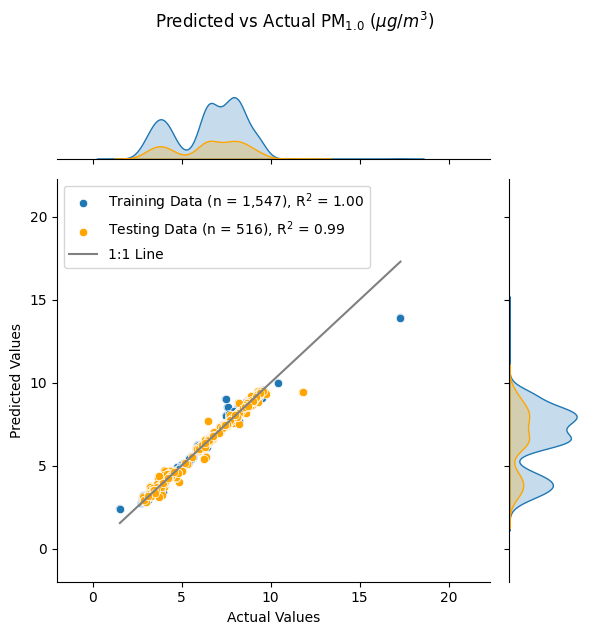

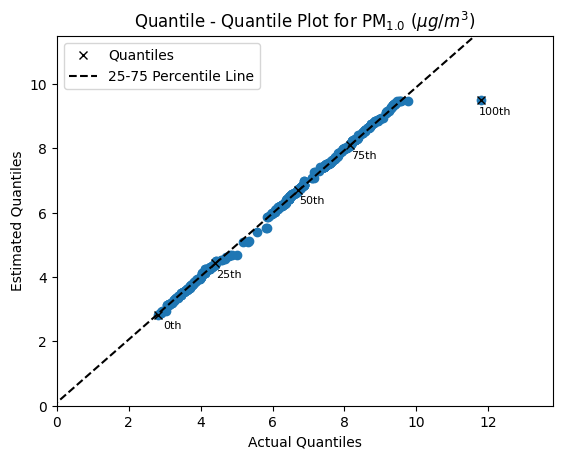

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1795
[LightGBM] [Info] Number of data points in the train set: 1547, number of used features: 9
[LightGBM] [Info] Start training from score 7.796416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

d:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\.calibration\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\.calibration\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\.calibration\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` inst

<Figure size 1200x1000 with 0 Axes>

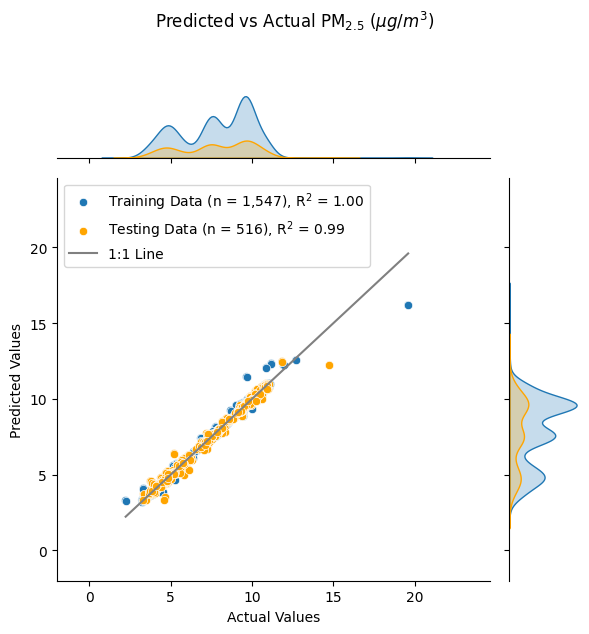

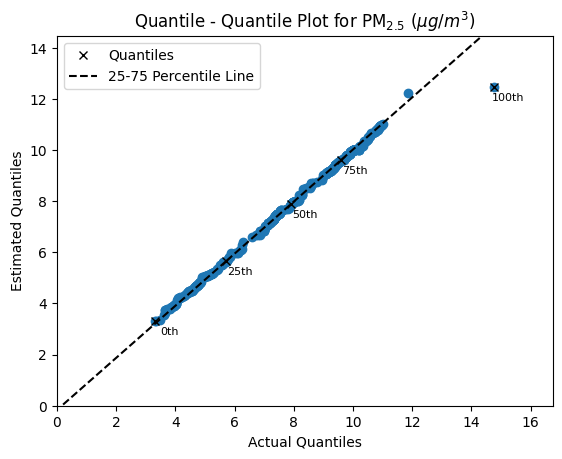

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1795
[LightGBM] [Info] Number of data points in the train set: 1547, number of used features: 9
[LightGBM] [Info] Start training from score 9.260431
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

d:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\.calibration\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\.calibration\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\.calibration\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` inst

<Figure size 1200x1000 with 0 Axes>

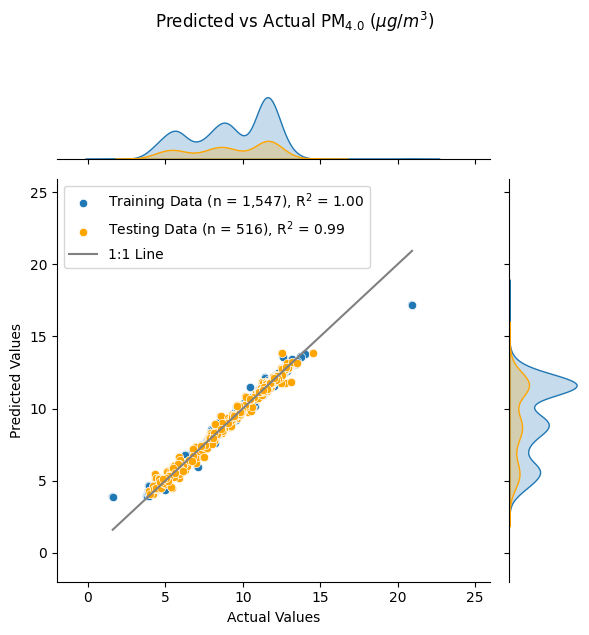

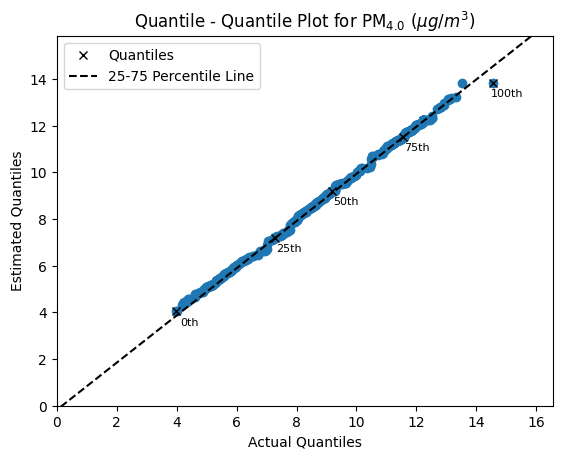

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1795
[LightGBM] [Info] Number of data points in the train set: 1547, number of used features: 9
[LightGBM] [Info] Start training from score 14.745755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1753
[LightGBM] [Info] Number of data points in the train set: 1237, number of used features: 9
[LightGBM] [Info] Start training from score 14.653579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1759
[LightGBM] [Info] Number of data points in the train set: 1237, number of used features: 9
[LightGBM] [Info] Start trainin

d:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\.calibration\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\.calibration\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\.calibration\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` inst

<Figure size 1200x1000 with 0 Axes>

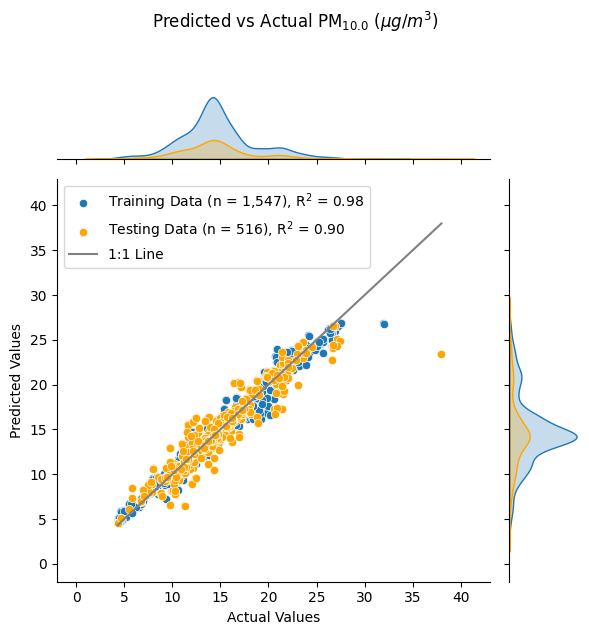

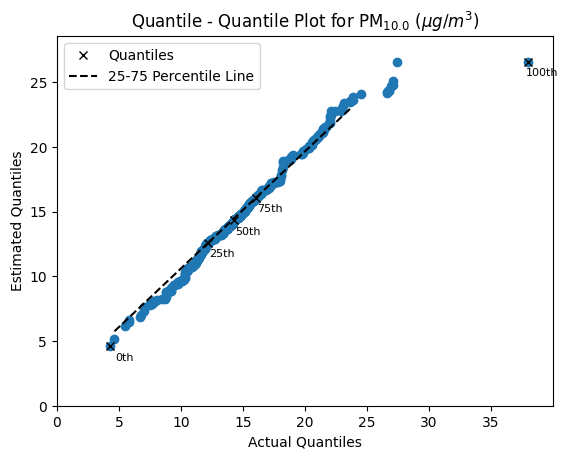

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1795
[LightGBM] [Info] Number of data points in the train set: 1547, number of used features: 9
[LightGBM] [Info] Start training from score 24.931718
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1753
[LightGBM] [Info] Number of data points in the train set: 1237, number of used features: 9
[LightGBM] [Info] Start training from score 24.814353
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1759
[LightGBM] [Info] Number of data points in the train set: 

d:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\.calibration\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\.calibration\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\.calibration\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` inst

<Figure size 1200x1000 with 0 Axes>

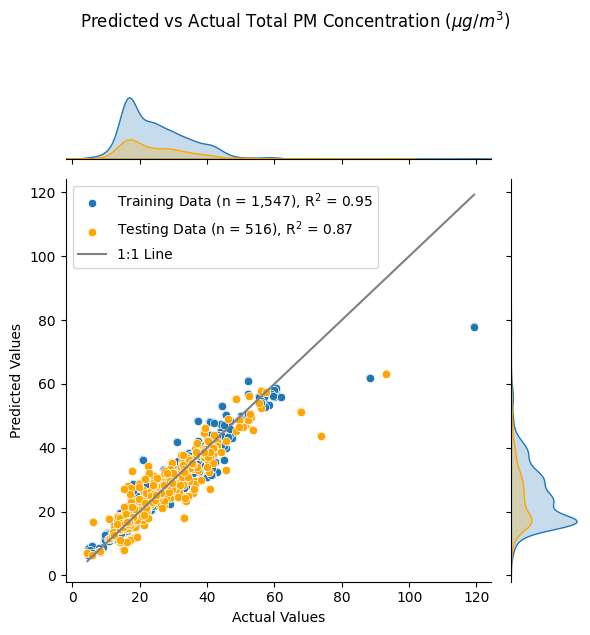

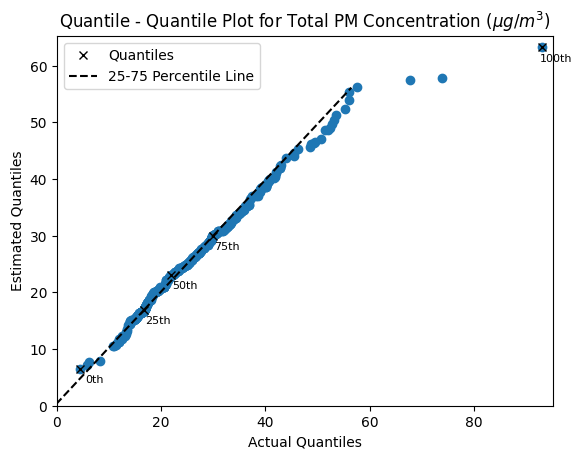

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1795
[LightGBM] [Info] Number of data points in the train set: 1547, number of used features: 9
[LightGBM] [Info] Start training from score 209.351060
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1753
[LightGBM] [Info] Numbe

d:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\.calibration\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\.calibration\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\.calibration\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` inst

<Figure size 1200x1000 with 0 Axes>

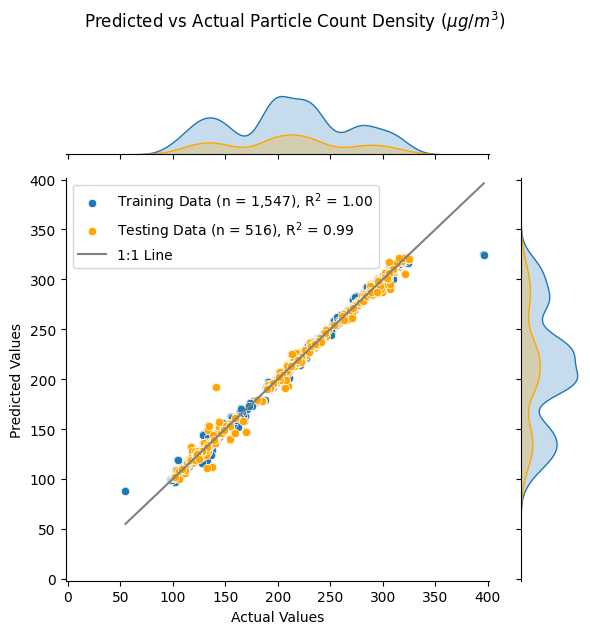

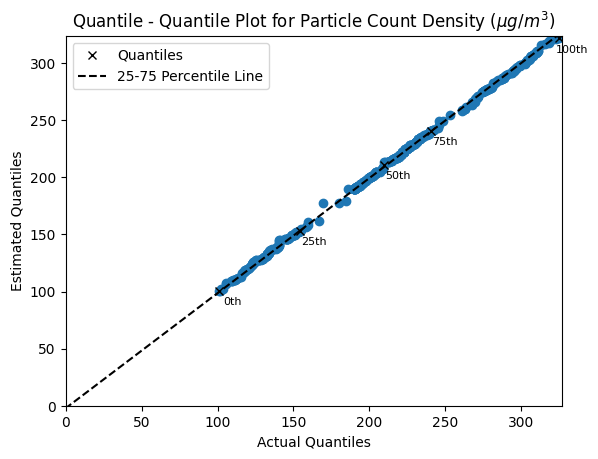

{'pm1': 0.99,
 'pm2_5': 0.99,
 'pm4': 0.99,
 'pm10': 0.9,
 'pmTotal': 0.87,
 'dCn': 0.99}

In [41]:
r2_score_test_stacking_optim = {}
print("========================= Stacking  Regressor  =  Linear Regressor ================================")
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Stacking_Regression_Linear_Regression.ipynb

for k,v in enumerate(Palas):
    X = Palas[v].drop([v+"Palas"],axis = 1)
    y = Palas[v][v+"Palas"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state= 40)
    # print("x train",X_train.shape)
    # print("x test",X_test.shape)
    # print("y train",y_train.shape)
    # print("y test",y_test.shape)
    
    r2_score_test  =  Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data,hyperparameter_dict_before_filtering[v])
    r2_score_test_stacking_optim[v] = r2_score_test
r2_score_test_stacking_optim

In [42]:
# r2_score_test_stacking_optim = {}
# print("========================= Stacking  Regressor  =  Lasso Regressor ================================")
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Stacking_Regression_Lasso_Regression.ipynb

# for k,v in enumerate(Palas):
#     X = Palas[v].drop([v+"Palas"],axis = 1)
#     y = Palas[v][v+"Palas"]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state= 40)
#     # print("x train",X_train.shape)
#     # print("x test",X_test.shape)
#     # print("y train",y_train.shape)
#     # print("y test",y_test.shape)
    
#     r2_score_test  =  Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data,hyperparameter_dict_before_filtering[v])
#     r2_score_test_stacking_optim[v] = r2_score_test
# r2_score_test_stacking_optim

In [43]:
# r2_score_test_stacking_optim = {}
# print("========================= Stacking  Regressor  =  Ridge Regressor ================================")
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Stacking_Regression_Ridge_Regression.ipynb

# for k,v in enumerate(Palas):
#     X = Palas[v].drop([v+"Palas"],axis = 1)
#     y = Palas[v][v+"Palas"]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state= 40)
#     # print("x train",X_train.shape)
#     # print("x test",X_test.shape)
#     # print("y train",y_train.shape)
#     # print("y test",y_test.shape)
    
#     r2_score_test  =  Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data,hyperparameter_dict_before_filtering[v])
#     r2_score_test_stacking_optim[v] = r2_score_test
# r2_score_test_stacking_optim

In [44]:
# r2_score_test_stacking_optim = {}
# print("========================= Stacking  Regressor  =  XGB Regressor ================================")
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Stacking_Regression_XGB_Regression.ipynb

# for k,v in enumerate(Palas):
#     X = Palas[v].drop([v+"Palas"],axis = 1)
#     y = Palas[v][v+"Palas"]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state= 40)
#     # print("x train",X_train.shape)
#     # print("x test",X_test.shape)
#     # print("y train",y_train.shape)
#     # print("y test",y_test.shape)
    
#     r2_score_test  =  Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data,hyperparameter_dict_before_filtering[v])
#     r2_score_test_stacking_optim[v] = r2_score_test
# r2_score_test_stacking_optim

In [45]:
# r2_score_test_stacking_optim = {}
# print("========================= Stacking  Regressor  =  Random Forest Regressor ================================")
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Stacking_Regression_Random_Forest_Regression.ipynb

# for k,v in enumerate(Palas):
#     X = Palas[v].drop([v+"Palas"],axis = 1)
#     y = Palas[v][v+"Palas"]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state= 40)
#     # print("x train",X_train.shape)
#     # print("x test",X_test.shape)
#     # print("y train",y_train.shape)
#     # print("y test",y_test.shape)
    
#     r2_score_test  =  Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data,hyperparameter_dict_before_filtering[v])
#     r2_score_test_stacking_optim[v] = r2_score_test
# r2_score_test_stacking_optim